In [147]:
import numpy as np
import pandas as pd
import seaborn as sns
plt.rcParams['figure.figsize']=(5, 5)

In [7]:
data=pd.read_csv(r'E:\Dataset\healthcare-dataset-stroke-data.csv')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [10]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# Lets fill Null Values

In [13]:

bmi_value_counts = data['bmi'].value_counts()
print(bmi_value_counts)

    

bmi
28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: count, Length: 418, dtype: int64


In [14]:
data['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [17]:
data['bmi'].fillna(data['bmi'].mean(),inplace=True)


In [18]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [20]:
data.drop('id',axis=1,inplace=True)

In [21]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [24]:
!pip install matplotlib


In [25]:
import matplotlib.pyplot as plt




# outlier removation

<function matplotlib.pyplot.show(close=None, block=None)>

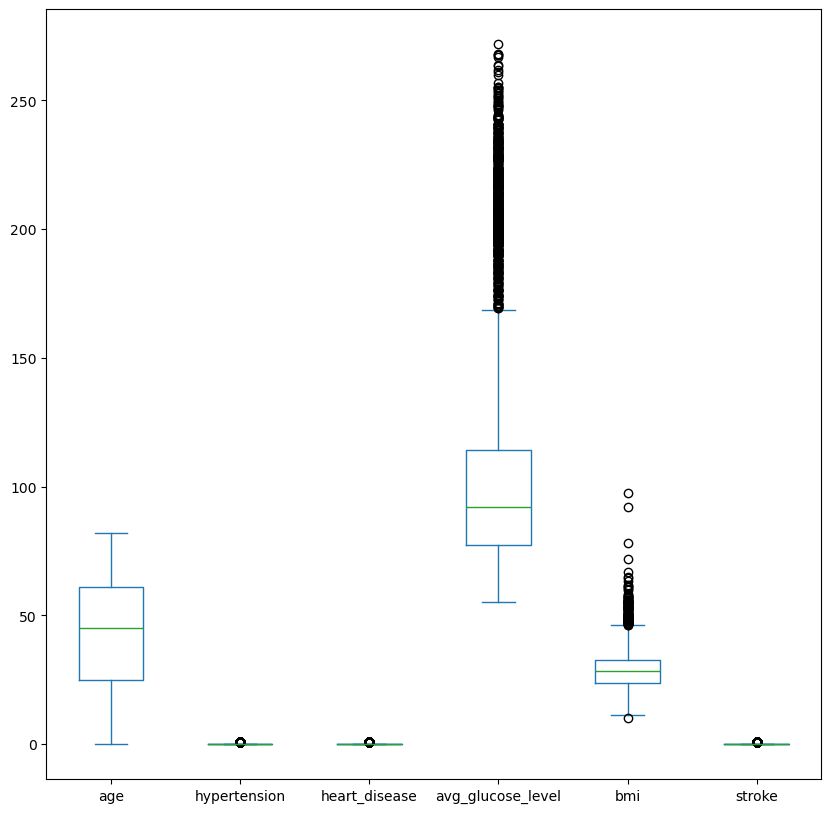

In [31]:
data.plot(kind='box')
plt.show

# label encoding

In [35]:
data['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [36]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [37]:
gender=enc.fit_transform(data['gender'])

In [38]:
smoking_status=enc.fit_transform(data['smoking_status'])

In [39]:
work_type=enc.fit_transform(data['work_type'])
Residence_type=enc.fit_transform(data['Residence_type'])
ever_married=enc.fit_transform(data['ever_married'])

In [42]:
data['work_type']=work_type
data['Residence_type']=Residence_type
data['gender']=gender
data['ever_married']=ever_married
data['smoking_status']=smoking_status

In [43]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Residence_tygenderpe
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1,0
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1,0
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0,1
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0,1
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0,0


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                5110 non-null   int32  
 1   age                   5110 non-null   float64
 2   hypertension          5110 non-null   int64  
 3   heart_disease         5110 non-null   int64  
 4   ever_married          5110 non-null   int32  
 5   work_type             5110 non-null   int32  
 6   Residence_type        5110 non-null   int32  
 7   avg_glucose_level     5110 non-null   float64
 8   bmi                   5110 non-null   float64
 9   smoking_status        5110 non-null   int32  
 10  stroke                5110 non-null   int64  
 11  Residence_tygenderpe  5110 non-null   int32  
dtypes: float64(3), int32(6), int64(3)
memory usage: 359.4 KB


# spitting the data for train and test

# X ---train_X,test_Y 80/20

In [48]:
X=data.drop('stroke',axis=1)
Y=data['stroke']

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=101)

In [50]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,Residence_tygenderpe
3831,0,55.0,0,0,0,3,0,67.10,31.400000,2,0
5085,0,72.0,0,0,1,2,1,83.89,33.100000,1,1
1593,1,31.0,0,0,1,2,1,71.31,25.800000,2,1
1324,0,80.0,0,0,1,0,1,84.86,28.893237,0,1
123,1,56.0,1,0,1,2,0,249.31,35.800000,2,0
...,...,...,...,...,...,...,...,...,...,...,...
4171,1,45.0,0,0,1,2,1,115.52,33.900000,1,1
599,0,59.0,1,0,1,2,1,204.86,30.800000,2,1
1361,0,59.0,0,0,1,2,1,89.96,28.100000,0,1
1547,1,59.0,0,1,1,3,0,194.98,30.400000,0,0


In [51]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [52]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [53]:
X_train_std

array([[-0.83822764,  0.52508975, -0.32887595, ...,  0.32750249,
         0.58675012, -1.02026398],
       [-0.83822764,  1.27625065, -0.32887595, ...,  0.5478543 ,
        -0.34367443,  0.98013849],
       [ 1.19059095, -0.53537271, -0.32887595, ..., -0.39836227,
         0.58675012,  0.98013849],
       ...,
       [-0.83822764,  0.70183349, -0.32887595, ..., -0.10023924,
        -1.27409897,  0.98013849],
       [ 1.19059095,  0.70183349, -0.32887595, ...,  0.19788379,
        -1.27409897, -1.02026398],
       [-0.83822764,  0.30416007, -0.32887595, ..., -0.70944717,
         0.58675012,  0.98013849]])

# Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(X_train_std,Y_train)


DecisionTreeClassifier()

In [59]:
Y_pred=dt.predict(X_test_std)

In [57]:
from sklearn.metrics import accuracy_score

In [60]:
ac_dt=accuracy_score(Y_test,Y_pred)

In [61]:
ac_dt

0.9031311154598826

# Logistic Regression

In [128]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [129]:
lr.fit(X_train_std,Y_train)

LogisticRegression()

In [130]:
Y_pred1=lr.predict(X_test_std)

In [131]:
ac_lr=accuracy_score(Y_test,Y_pred1)

In [132]:
ac_lr

0.9471624266144814

# KNN

In [75]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [76]:
knn.fit(X_train_std,Y_train)

KNeighborsClassifier()

In [77]:
Y_pred=knn.predict(X_test_std)

In [78]:
ac_knn=accuracy_score(Y_test,Y_pred)

In [79]:
ac_knn

0.9452054794520548

# Random Forest

In [133]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [134]:
rf.fit(X_train_std,Y_train)

RandomForestClassifier()

In [135]:
Y_pred2=rf.predict(X_test_std)

In [136]:
ac_rf=accuracy_score(Y_test,Y_pred2)

In [137]:
ac_rf

0.9461839530332681

# SVM

In [138]:
from sklearn.svm import SVC

In [139]:
sv=SVC()

In [140]:
sv.fit(X_train_std,Y_train)

SVC()

In [141]:
Y_pred3=sv.predict(X_test_std)

In [142]:
ac_sv=accuracy_score(Y_test,Y_pred3)

In [143]:
ac_sv

0.9471624266144814

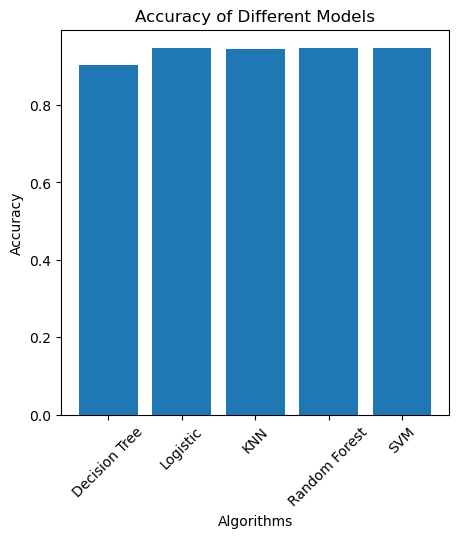

In [155]:

Algorithms = ['Decision Tree', 'Logistic', 'KNN', 'Random Forest', 'SVM']

accuracies = [ac_dt, ac_lr, ac_knn, ac_rf, ac_sv]

plt.bar(models, accuracies)

plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')

plt.xticks(rotation=45)

plt.show()


In [154]:
import pickle 


with open("E:\\Dataset\\logistic.pkl", "wb") as model_file:
    pickle.dump(Y_pred1, model_file)


filename = r'E:\Dataset\finalized_model.sav'
with open(filename, 'wb') as model_file:
    pickle.dump(lr, model_file)

